 
    
**Название проекта**
Procrastinate Pro+
_____
**Описание исследования.**
Компания, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: 
- лог сервера с данными об их посещениях, 
- выгрузка их покупок за этот период, 
- рекламные расходы.
_____
**Цель исследования.**
    
Разобраться в причинах убытков компании и помочь выйти в плюс
    
_____
**Задачи исследования.** \
Требуется выяснить: 
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.
_____
**Исходные данные.**
    
Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

***Часть 2. Подготовка данных:***
* [1. Приведение названий столбцов к нижнему регистру.](#2-bullet)
* [2. Приведение данных к нужному типу.](#3-bullet)
* [3. Проверка на дубликаты.](#4-bullet)
* [4. Переименование столбцов](#5-bullet)

***Часть 3. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.***
* [1. Get profiles](#6-bullet)
* [2. Get_retention - удержание](#7-bullet)
* [3. ROI LTV](#12-bullet)
* [4. функция для визуализации LTV и ROI](#13-bullet)
* [5. функция для расчета конверсии](#14-bullet)
* [6. функция для визуализации LTV и ROI](#15-bullet)
* [7. функция для расчета удержания](#16-bullet)
* [8. функция для визуализации удержания](#17-bullet)

***Часть 4. Исследовательский анализ данных. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.***
* [1. Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.](#8-bullet)
* [2. Tаблица, отражающую количество пользователей и долю платящих из каждой страны.](#9-bullet)
* [3. Tаблица, отражающая количество пользователей и долю платящих для каждого утройства..](#10-bullet)
* [4. Таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения.](#11-bullet)

***Часть 5. Маркетинг 
* [1 Распределение трат по рекламным источникам](#12-bullet)
* [2 Визуализация динамики изменения расходов во времени](#18-bullet)
* [3 Средняя стоимость привлечение одного пользователя (CAC) из каждого источника](#19-bullet)

***Часть 6. Окупаемость рекламы
* [1. Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI](#20-bullet)
* [2. графики с разбивкой по регионам](#21-bullet)
* [3. графики с разбивкой по источникам](#22-bullet)
* [4. графики с разбивкой по устройствам](#23-bullet)
* [5. конверсия](#24-bullet)

***Часть 7. Общий вывод
* [7. вывод](#25-bullet)



<h3> 1. Изучение общей информации

 <a id='1-bullet'></a> <b> 1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.

In [30]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import math

In [42]:
#загрузка файлов
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv', sep=';')
    costs = pd.read_csv('costs_info_short.csv')


In [43]:
# вывожу информацию о содержании на экран
print(visits.info())
print("_____________")
print(orders.info())
print("_____________")
print(costs.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
_____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40214 entries, 0 to 40213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40214 non-null  int64  
 1   Event Dt  40214 non-null  object 
 2   Revenue   40214 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
_____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data col

Пропусков нет, нужно привести названия столбцов к нижнему регистру, переименовать столбцы чтобы не было пробелов, привести дату в файлах к формату дата

<h3> 2 Подготовка данных

 <a id='2-bullet'></a> <b> 1. Приведение названий столбцов к нижнему регистру

In [44]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

 <a id='3-bullet'></a> <b> 2. Приведение данных к нужному типу

In [45]:
#привожу столбцы с датой к формату "дата"
visits['session start'] = pd.to_datetime(visits['session start'])
visits['session end'] = pd.to_datetime(visits['session end'])
orders['event dt'] = pd.to_datetime(orders['event dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

 <a id='4-bullet'></a> <b> 3. Проверка на дубликаты

In [46]:
print(costs.duplicated().sum())
print(visits.duplicated().sum())
print(orders.duplicated().sum())

0
0
2


In [47]:
#удалю явные дубликаты
orders = orders.drop_duplicates().reset_index(drop=True)
print(orders.duplicated().sum())
#проверяю что удалилось только 2 строки
orders.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user id   40212 non-null  int64         
 1   event dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


 <a id='5-bullet'></a> <b> 4. Переименование столбцов

In [49]:

visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]

<h3> 3. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

 <a id='6-bullet'></a> <b> 1. Get_profiles

In [50]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #       profiles[event] = profiles['user_id'].isin(
    #            events.query('event_name == @event')['user_id'].unique()
     #       )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


 <a id='7-bullet'></a> <b> 2. Get_retention - удержание

In [51]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

 <a id='12-bullet'></a> <b> 3. ROI LTV

In [52]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

 <a id='13-bullet'></a> <b> 4. функция для визуализации LTV и ROI

In [53]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<b> 5. Функция для сглаживания фрейма

In [54]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

 <a id='14-bullet'></a> <b> 6. Функция для расчета конверсии

In [55]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

  <a id='15-bullet'></a> <b> 7. Функция для визуализации конверсии

In [56]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

  <a id='16-bullet'></a> <b> 8. Функция для расчёта удержания

In [57]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

  <a id='17-bullet'></a> <b> 9. Функция для визуализации удержания

In [58]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

<h3>4 Исследовательский анализ данных

 <a id='8-bullet'></a> <b> 1 Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [61]:
# составляю профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [62]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print("Минимальная дата привлечения пользователей", min_analysis_date)
print("Максимальная дата привлечения пользователей", observation_date)

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


 <a id='9-bullet'></a><b> 2 Tаблица, отражающая количество пользователей и долю платящих из каждой страны.

In [63]:
#сделаю функцию для посроения таблицы с процентом платящих пользователей
def user_persent (index):
    users = (profiles
             .pivot_table(index=index, values='payer', aggfunc=['count','sum','mean']).reset_index()
             .rename(columns={'count':'users','sum':'paying_users','mean': 'ration'})
             .droplevel(1, axis=1)
             .sort_values(by='ration', ascending=False)
             .style.format({'ration':'{:.2%}'})
            )
    return users


In [64]:
user_persent("region")

,region,users,paying_users,ration
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


В США количество пользователей на порядок выше чем в других странах, также там самый большой процент платящих пользователей  

 <a id='10-bullet'></a><b> 3 Tаблица, отражающая количество пользователей и долю платящих для каждого утройства.

In [65]:
user_persent("device")

,device,users,paying_users,ration
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


Самое большое число платящих пользователей приходится на Мас и iPhone, чуть меньше на Андроид

 <a id='11-bullet'></a> <b> 4 Таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения.


In [67]:
user_persent("channel")

,channel,users,paying_users,ration
1,FaceBoom,29144,3557,12.20%
0,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%
6,TipTop,19561,1878,9.60%
5,RocketSuperAds,4448,352,7.91%
7,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%


Самое больше количество привлеченных пользователей через канал FaceBoom и тут же самое большое количество платящих пользователей. \ 
Бесплатных - органических пользователей самое большое количество, однако платящих среди них минимум

Вывод: Приложение Procrastinate Pro+ используется в 4х странах США, Германия, Великобритания и Франция. В США приложением пользуются больше чем в Европе.  \
Из 4х платформ, на которых выходит приложение, Mac и iphone лидируют как по количеству пользователей, так и по проценту платящих. \
Было использовано 10 каналов привлечения пользователей, самым эффективным оказался FaceBoom привлек 29 тыс пользователей из нах 12.2 % платящих, AdNonSense и lambdaMediaAds привлекли меньше всех остальных каналов 3,8 и 2.1 тыс,  однко среди этих пользователей более 10% платящие.

<h3> 5 Маркетинг 

 <a id='12-bullet'></a> <b> 1 Распределение трат по рекламным источникам, то есть сколько денег потратили на каждый источник. общая сумму расходов на маркетинг.

In [68]:
sum_total = costs['costs'].sum()
print('Общая сумма расходов на маркетинг', sum_total)

Общая сумма расходов на маркетинг 105497.30000000002


In [69]:
costs.groupby('channel')['costs'].sum().sort_values()

channel
YRabbit                 944.22
MediaTornado            954.48
lambdaMediaAds         1557.60
LeapBob                1797.60
RocketSuperAds         1833.00
OppleCreativeMedia     2151.25
AdNonSense             3911.25
WahooNetBanner         5151.00
FaceBoom              32445.60
TipTop                54751.30
Name: costs, dtype: float64

In [71]:
#создам таблицу с суммой затрат и процентом от общих трат на рекламу по источникам
media = costs.pivot_table(index='channel', values='costs', aggfunc=['sum'])                      
            
media_result = media
media_result['%'] = media/sum_total*100

media_result.sort_values(by='%')

,sum,%
,costs,
channel,,
YRabbit,944.22,0.895018
MediaTornado,954.48,0.904744
lambdaMediaAds,1557.60,1.476436
LeapBob,1797.60,1.703930
RocketSuperAds,1833.00,1.737485
OppleCreativeMedia,2151.25,2.039152
AdNonSense,3911.25,3.707441
WahooNetBanner,5151.00,4.882589


Более 80% затра приходятся на 2 источника Тип Топ и ФейсБум. На каждый оставшийся источник приходится менее 5%

Разбивка пользователей по старанам

In [74]:
profiles['user_id'].count()

150008

In [75]:
#посмотри сколько пользователей приходится на каждую страну и процент от общего числа
users_total = profiles['user_id'].count()

users =     ( profiles
             .pivot_table(index='region', values='user_id', aggfunc='count')
                        )

users_result=users
users_result['%'] = users/users_total*100

users_result.sort_values(by='user_id')
users_result

,user_id,%
region,,
France,17450,11.632713
Germany,14981,9.986801
UK,17575,11.716042
United States,100002,66.664445


 <a id='18-bullet'></a> <b>2 Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [ ]:
#Добавлю столбец с месяцем и неделей для группировки
costs['month'] = costs['dt'].astype('datetime64[M]') 
costs['week'] = costs['dt'].astype('datetime64[W]')

<Figure size 1500x800 with 0 Axes>

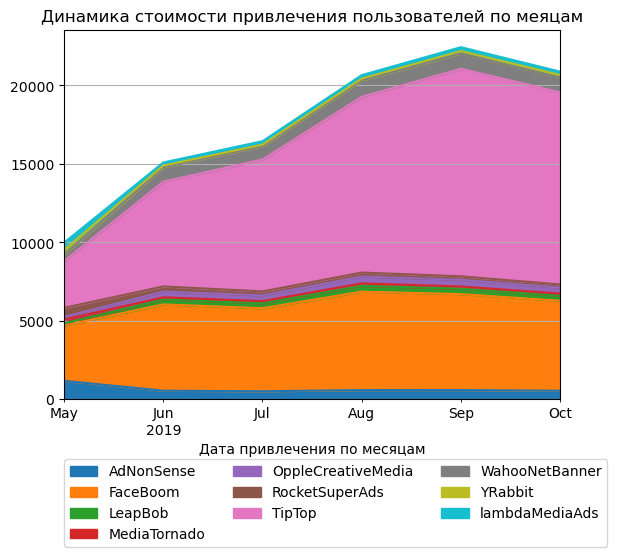

<Figure size 1500x800 with 0 Axes>

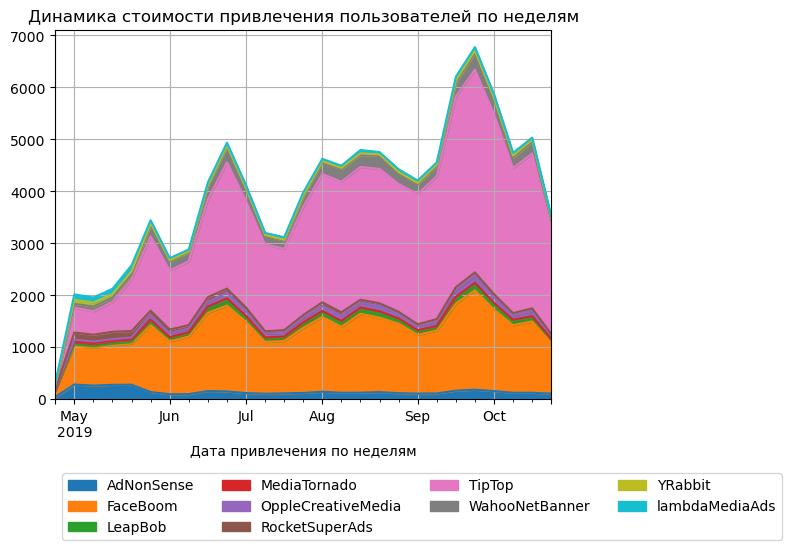

In [109]:
plt.figure(figsize=(15, 8)) # задаю размер общей сетки

# делаю сводную таблицу с группровкой по месяцам
costs.pivot_table(
        index='month', columns='channel', values='costs', aggfunc='sum'
    ).plot.area(grid=True)
plt.xlabel('Дата привлечения по месяцам')
plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.title('Динамика стоимости привлечения пользователей по меяцам')
plt.show()

# делаю сводную таблицу с группровкой по неделям
plt.figure(figsize=(15, 8)) 
costs.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    ).plot.area(grid=True)
plt.xlabel('Дата привлечения по неделям')
plt.legend(ncol=4, bbox_to_anchor=(0, -0.4), loc='lower left')
plt.title('Динамика стоимости привлечения пользователей по неделям')

plt.show()


Стоимоть привлечения новых пользователей у канала TipTop самая высокая, и показывает самый сильный рост, достигает пика в 12000 в сентябре , FaceBoom на втором месте с в среднем стоит около 6тыс.\
По остальным каналам расходы не превышают 500 и стабльные

 <a id='19-bullet'></a> <b> 3. Средняя стоимость привлечение одного пользователя (CAC) из каждого источника. 

Средняя стоимость привлечения одного клиенты по каналам

In [110]:
(
profiles.groupby('channel').agg({'user_id' : 'nunique','acquisition_cost': 'mean'})
 .sort_values(by='acquisition_cost')
)

,user_id,acquisition_cost
channel,,
organic,56439,0.000000
LeapBob,8553,0.210172
MediaTornado,4364,0.218717
YRabbit,4312,0.218975
OppleCreativeMedia,8605,0.250000
RocketSuperAds,4448,0.412095
WahooNetBanner,8553,0.602245
lambdaMediaAds,2149,0.724802
AdNonSense,3880,1.008054


средний CAC на одного пользователя для всего проекта

In [111]:
#делю общую стоимость рекламы на количество уникальных пользователей исключая канал органик т.к. они сами пришли 
profiles['acquisition_cost'].sum()/len(profiles[profiles['channel'] != 'organic' ]['user_id'].unique())

1.1274813239427588

Всего на рекламу было потрачено 105497, \
Самые дорогие пользователи получились у канала Tip Top, больше чем в 2 раза дороже чем у FaceBoom, но как видно из предыдущего раздела Tip Top на 4м месте по качеству пользователей (сколько процентов платящих)\
Так же видно, что со временем привлечение клиентов становится дороже по 2м каналам Тип Топ и ФейсБум\
Средняя стоимость привлечения 1 клиента 1.27\
Средняя стоимость привлечения у ТипТоп 2.79, у ФейсБум 1.11

<h3> 6 Окупаемость рекламы

Предполагает что сегодня 01.11.19. Пользователи должны окупаться не позднее чем через 14 дней после привлечения

 <a id='20-bullet'></a> <b> 1. Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

In [112]:
#задаю observation date
observation_date = datetime(2019, 11, 1).date()
#горизонт
horizon_days = 14

In [113]:
# получаю сырые данные, ltv, ltv в динамике, roi и roi в динамике
result_raw, ltv, ltv_history, roi, roi_history = \
        get_ltv(profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=[])
       

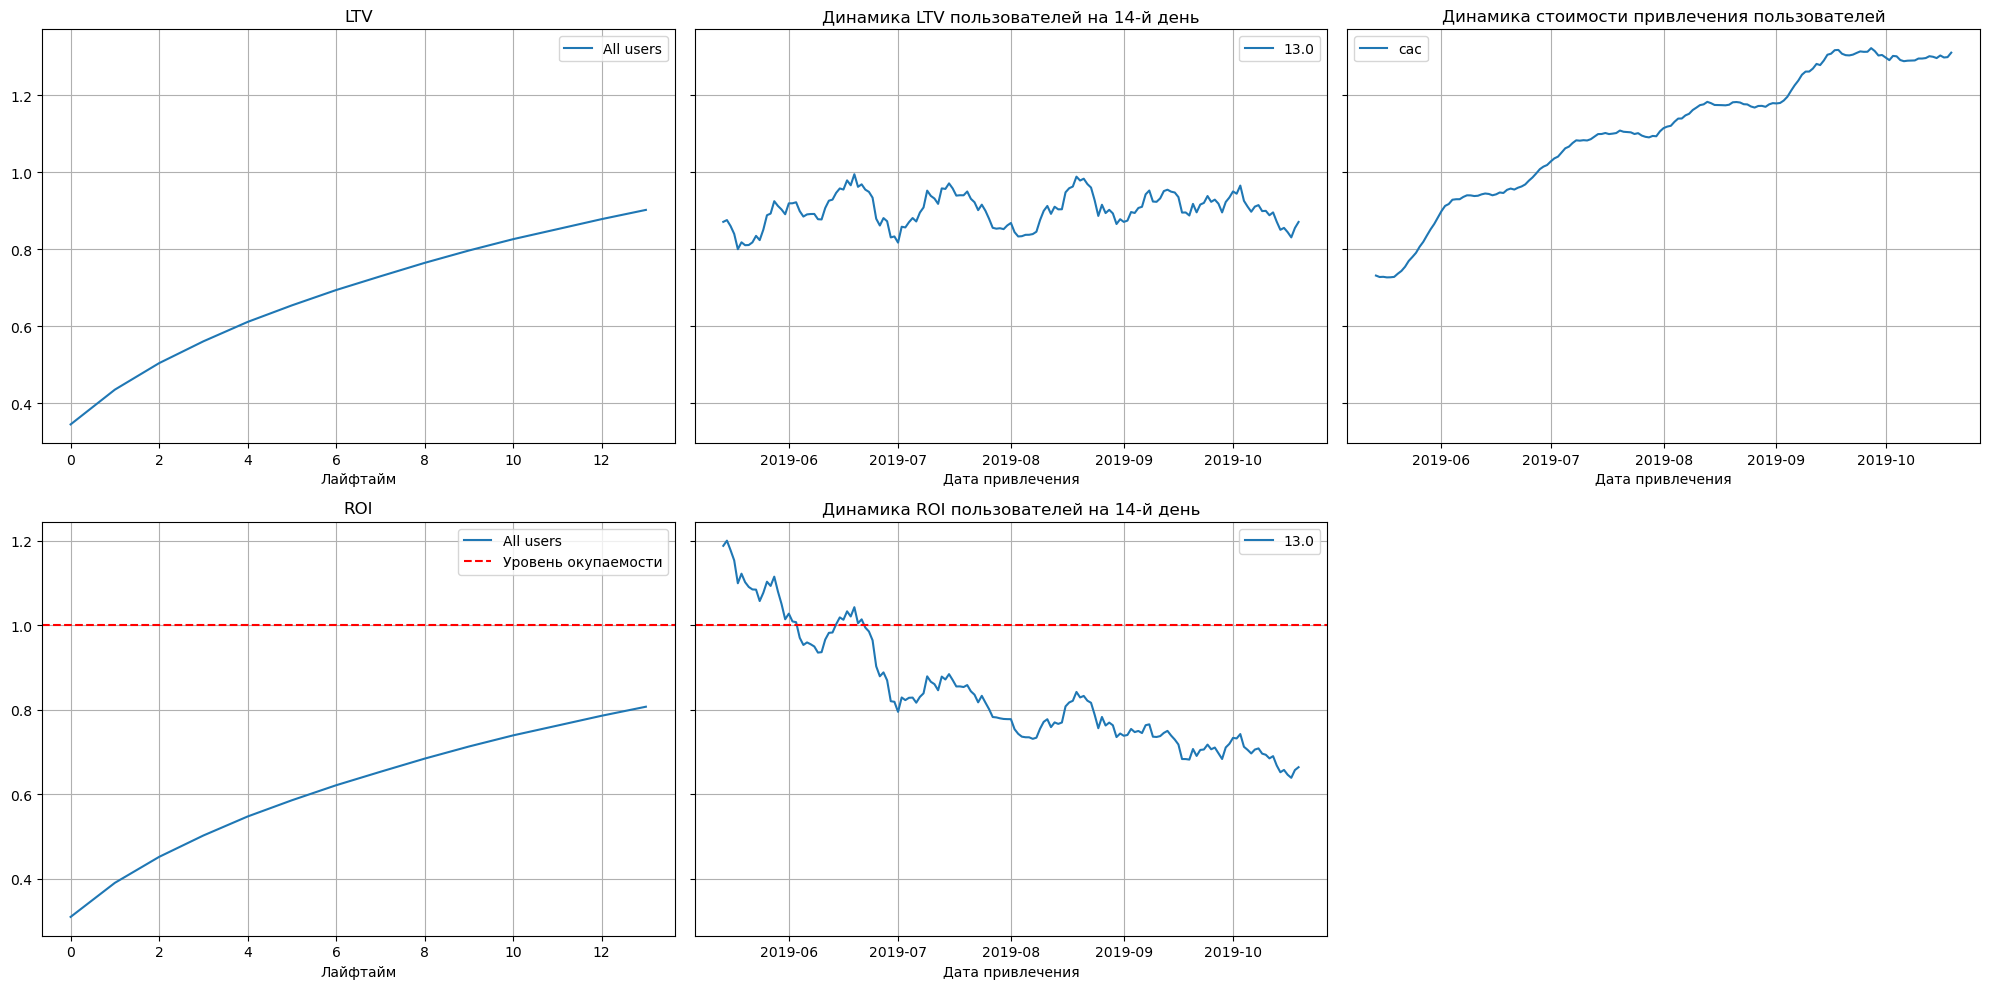

In [114]:
#графики для ltv, roi
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)


Реклама не окупается, хотя в конце второй недели ROI вплотную приблизился к границе окупаемости.\
В Динамике видно, что пользователи привлеченные в июне окупались, далее произошло резкое падение \
LTV стабилен,\
стоимость привлечения пользователей с июня по июль резко выросла, а окупаемость в тот же период пошла вниз.

Рассмотрим более детально и сделаем графики по характеристикам

 <a id='21-bullet'></a> <b> графики с разбивкой по регионам

In [115]:
# получаю сырые данные, ltv, ltv в динамике, roi и roi в динамике
result_raw, ltv, ltv_history, roi, roi_history = \
    get_ltv(profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region'])
       

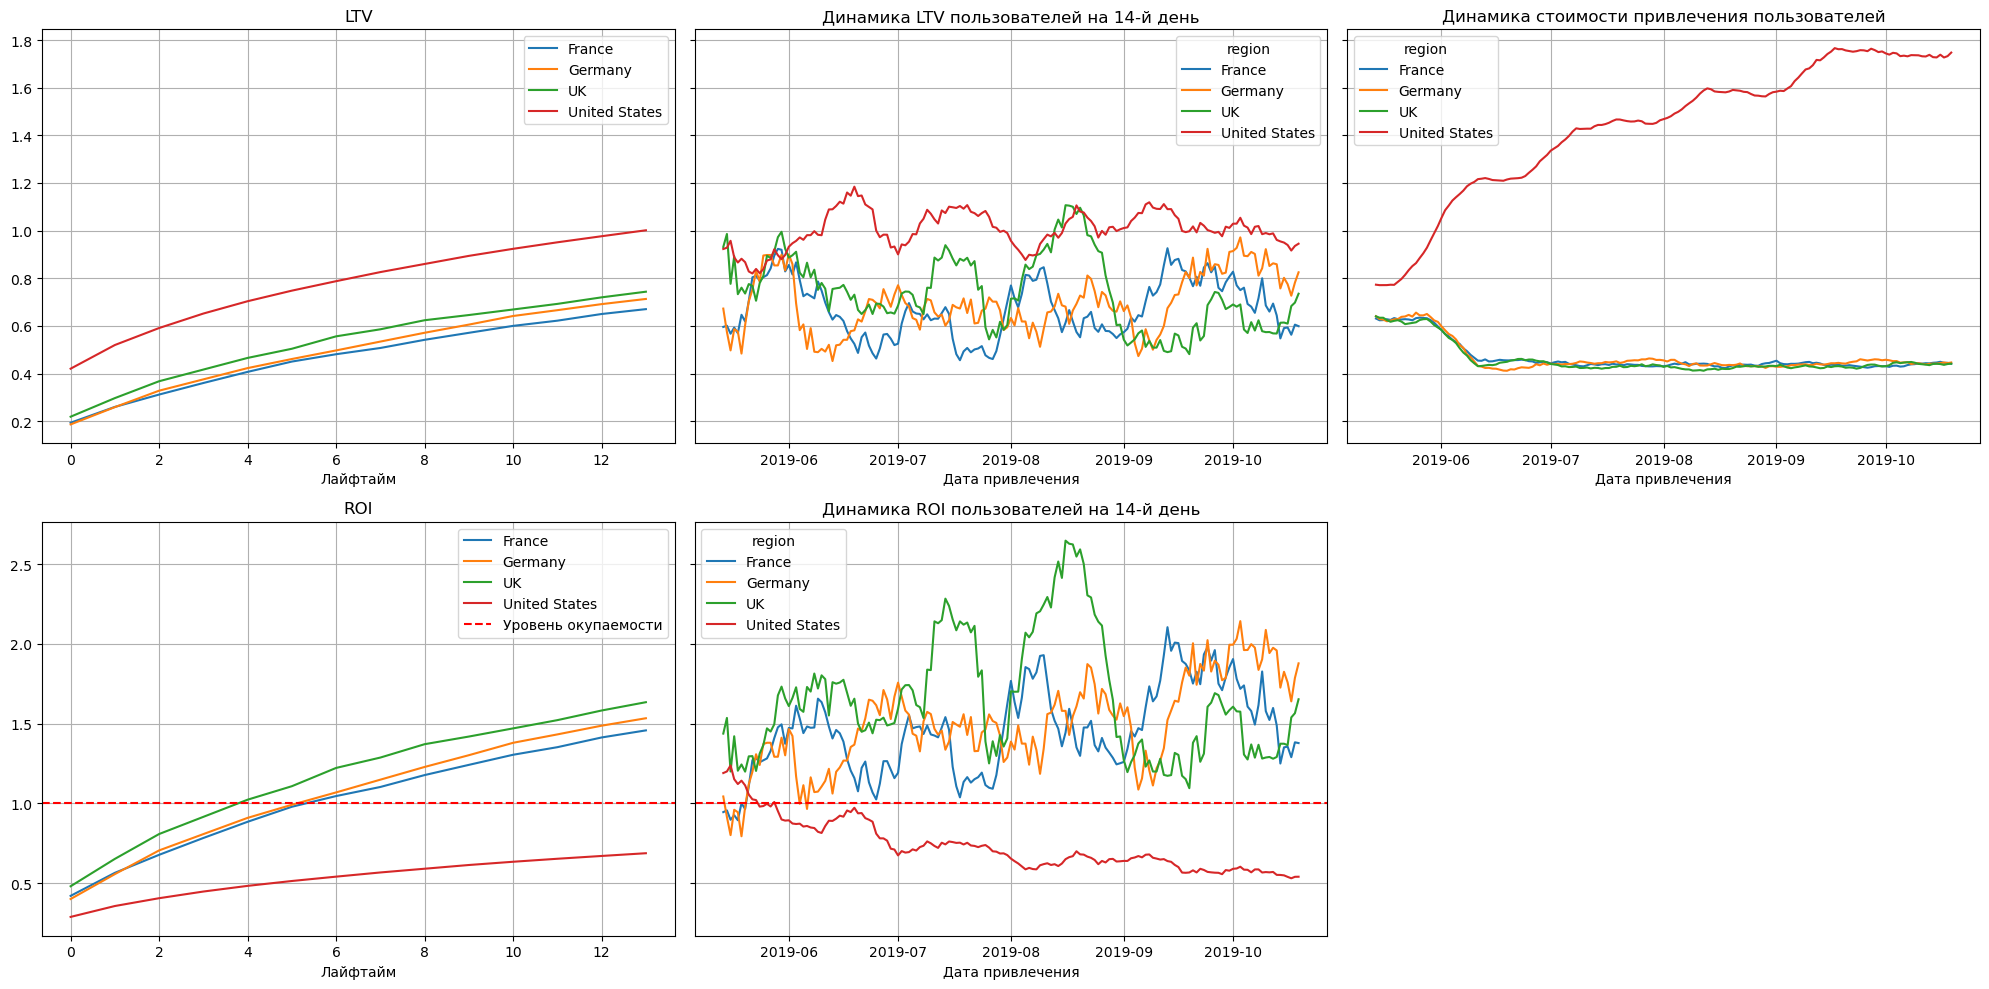

In [116]:
#графики для ltv, roi
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)


LTV У пользователей из США растет быстрее, однако и стоимость привлечения таких пользователей сильно выше - в среднем 1 против 0,3 у остальных регионов. \
Окупились все регионы к 4му дню, кроме США, тут реклама не окупилась и на 14 день, 0,8 в крайней точке\
В динамике roi так же видно что окупаемость пользователей США пошла вниз \
Видим что привлекать пользователей из США очень дорого, посмотрим что скажут следующие графики

Смотрим какие каналы привлечения в каких регионах работают 

In [117]:
profiles.pivot_table(index=['region', 'channel'], values='user_id', aggfunc='count')

user_id
region        channel                    
France        AdNonSense             1366
              LeapBob                2988
              OppleCreativeMedia     2991
              WahooNetBanner         2971
              lambdaMediaAds          742
              organic                6392
Germany       AdNonSense             1219
              LeapBob                2519
              OppleCreativeMedia     2562
              WahooNetBanner         2579
              lambdaMediaAds          649
              organic                5453
UK            AdNonSense             1295
              LeapBob                3046
              OppleCreativeMedia     3052
              WahooNetBanner         3003
              lambdaMediaAds          758
              organic                6421
United States FaceBoom              29144
              MediaTornado           4364
              RocketSuperAds         4448
              TipTop                19561
              YRabbit                4312
              organic               38173

Посмортим на удержание по регионам

In [118]:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=['region']
)

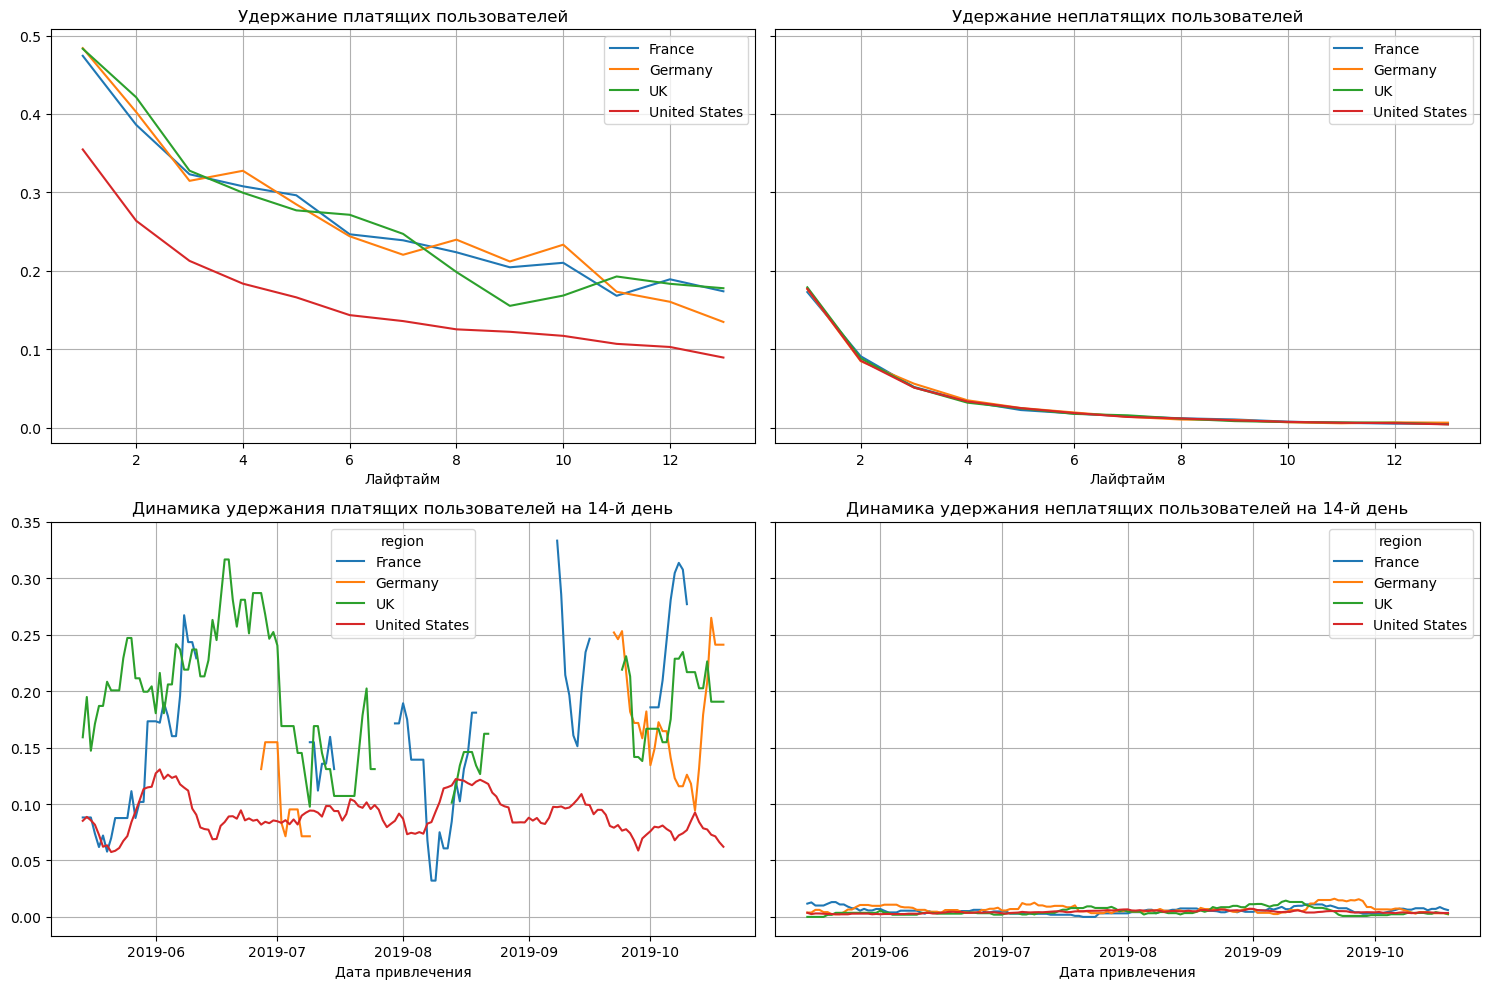

In [119]:
plot_retention(retention_grouped, retention_history, horizon_days) 

Видим что платящие пользователи США удерживаются хуже остальных, неплатящие одинаково плохо по всем странам

 <a id='22-bullet'></a> <b> графики с разбивкой по источникам привлечения

In [120]:
# получаю сырые данные, ltv, ltv в динамике, roi и roi в динамике
result_raw, ltv, ltv_history, roi, roi_history = \
    get_ltv(profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['channel'])
       

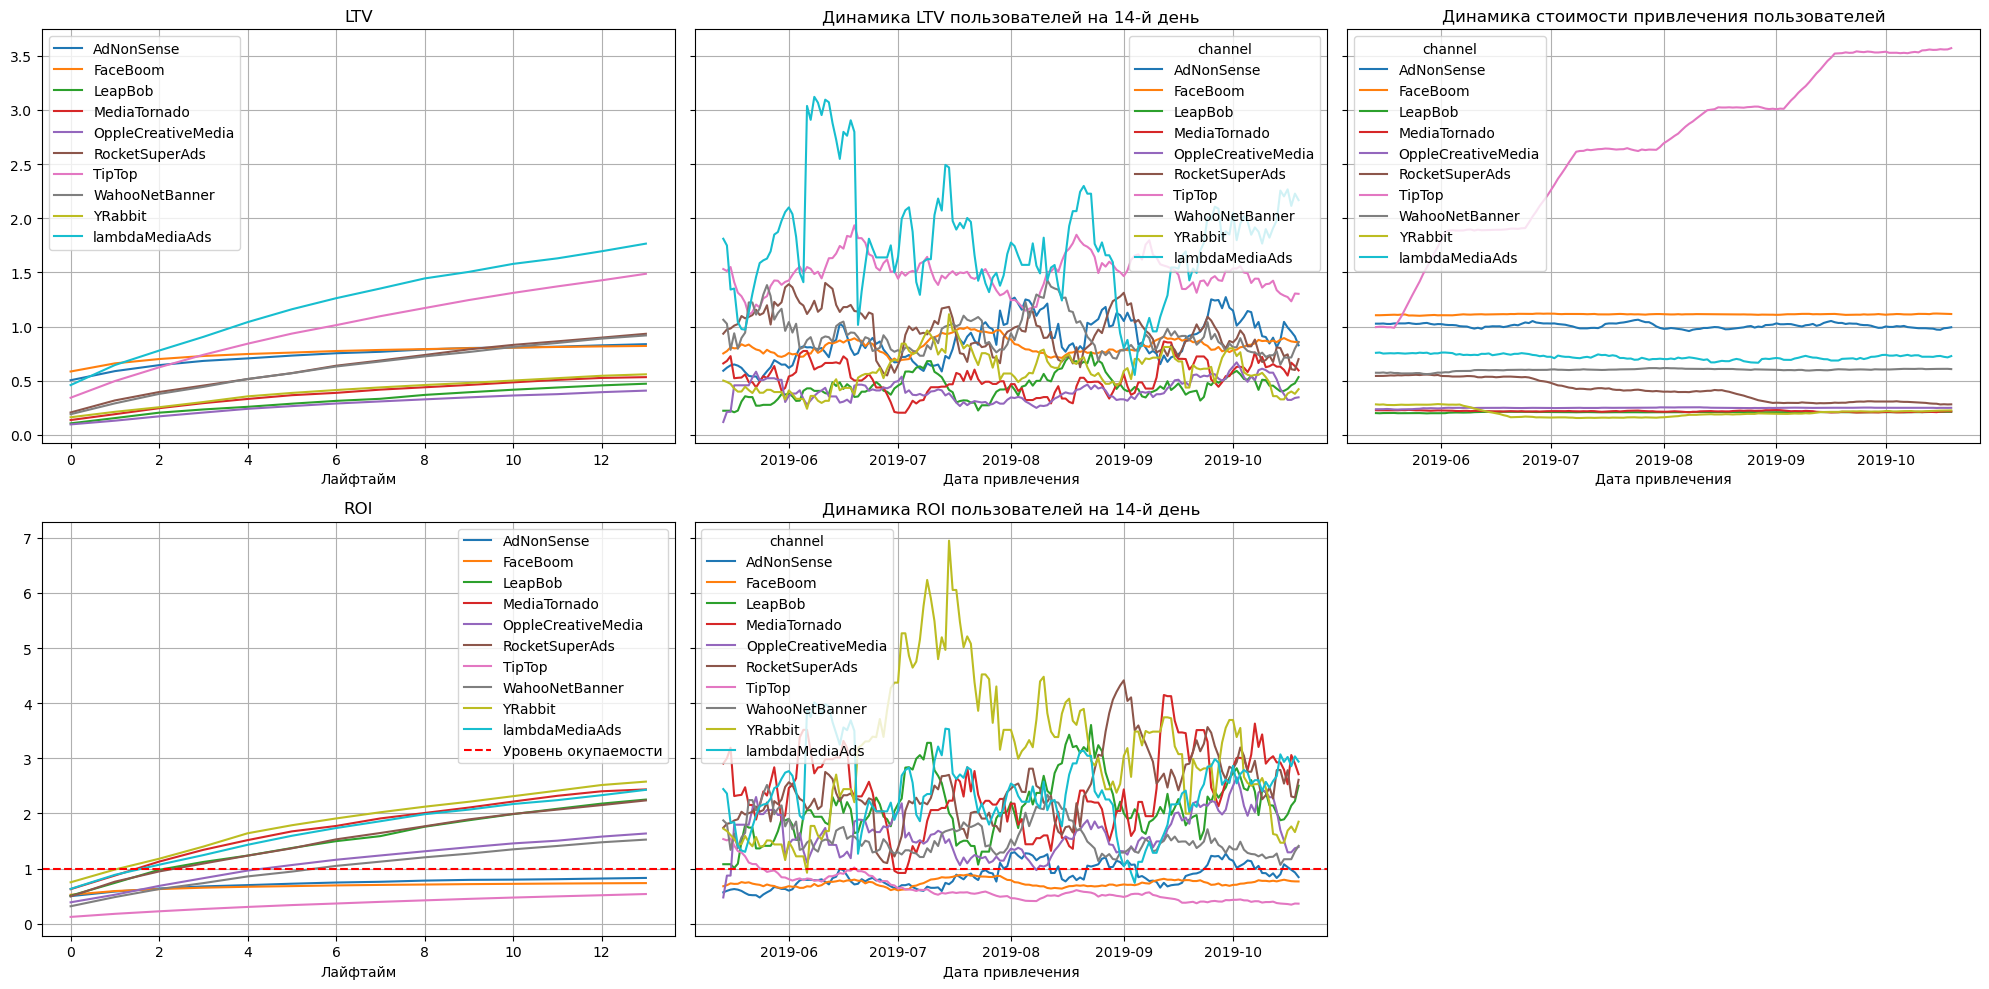

In [121]:
#графики для ltv, roi
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)


LTV стабилен, немного выбивается у lambda media, у стоимости привлечения есть явный антилидер ТипТоп, стоимость взлетает - окупаемость падает. \
Ниже окупаемость оказались 3 источника ТипТоп, FacaBoom и Adnonsense. В динамике они так же все время ниже окупаемости.
И так у нас 3 подозреваемых

Посмторим на удержание

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

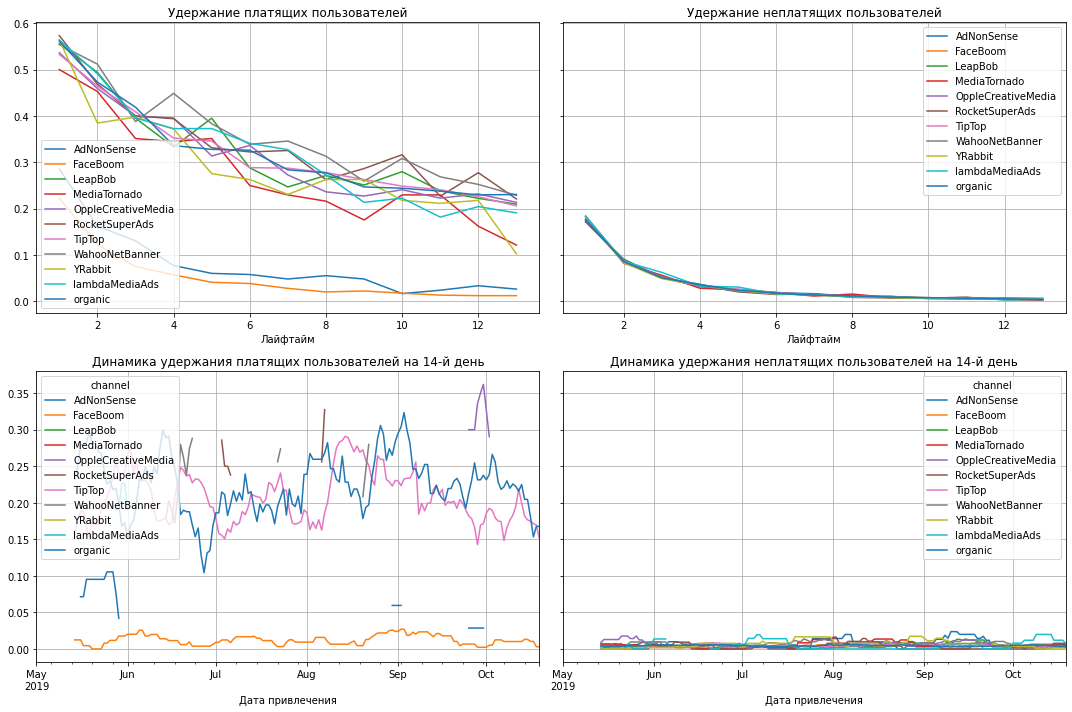

In [45]:
plot_retention(retention_grouped, retention_history, horizon_days) 

 <a id='23-bullet'></a> <b> Графики разбивки по устройствам

In [46]:
# получаю сырые данные, ltv, ltv в динамике, roi и roi в динамике
result_raw, ltv, ltv_history, roi, roi_history = \
    get_ltv(profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device'])
       

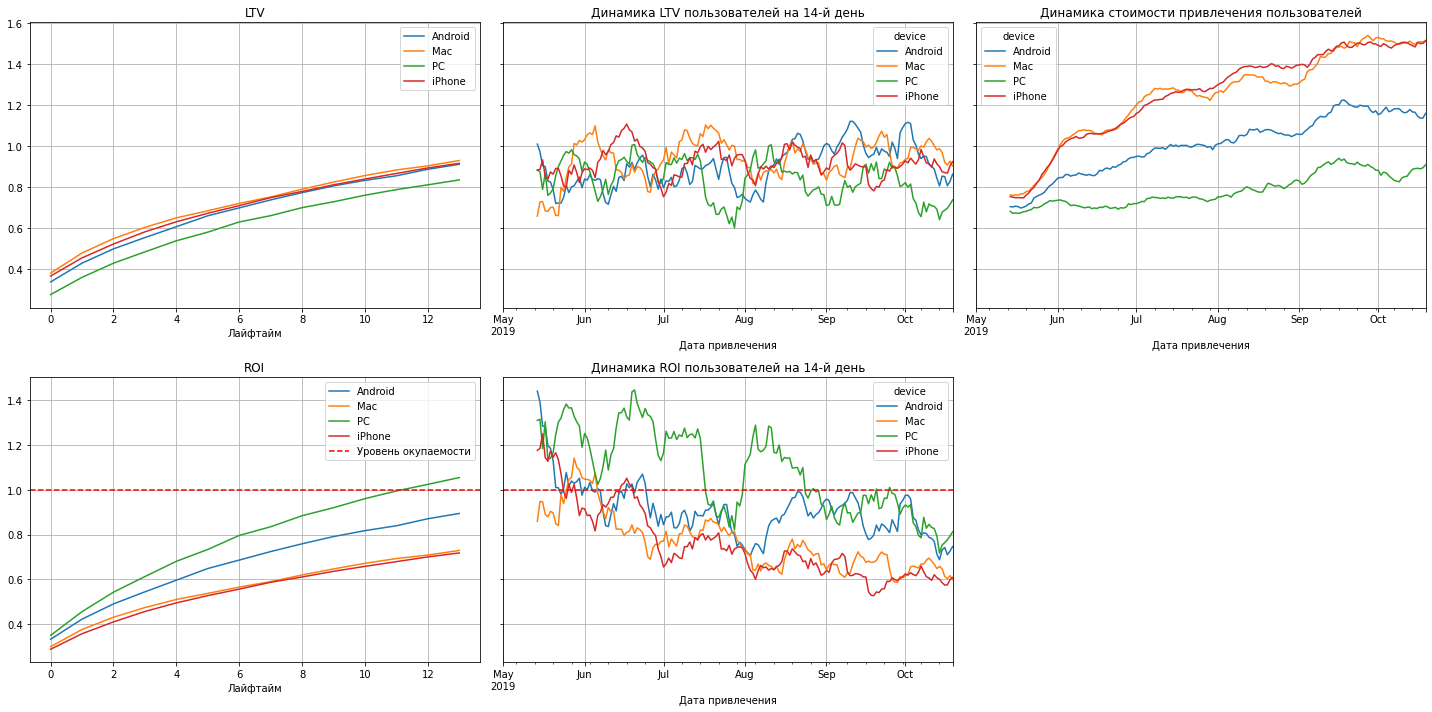

In [47]:
#графики для ltv, roi
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)


LTV выглядит стабильно для всех устройств. \
По стоимости привлечения iphone и Мас на протяжении всего периода стабильно дороже РС и Андроид. К концу периода 1 против 0,8 у Андроида и 0,6 у РС\
Так же Мас, iphone и Андроид не окупились,  РС окупается на 11 день\
Динамика окупаемости - все платформы стартовали с окупаемостью 1,5 и выше, но к июлю iphone и Мас упали до 0,75 и дальше снижались до 0,6. Андроид упал, но не так сильно, РС выше линии окупаемости, однако к октябрю тоже есть снижение 
Стоит обратить внимание на пользователей Мас и iphone стоимость их привлечения высока, а до окупаемости они не дошли 

Удержание по устройстам

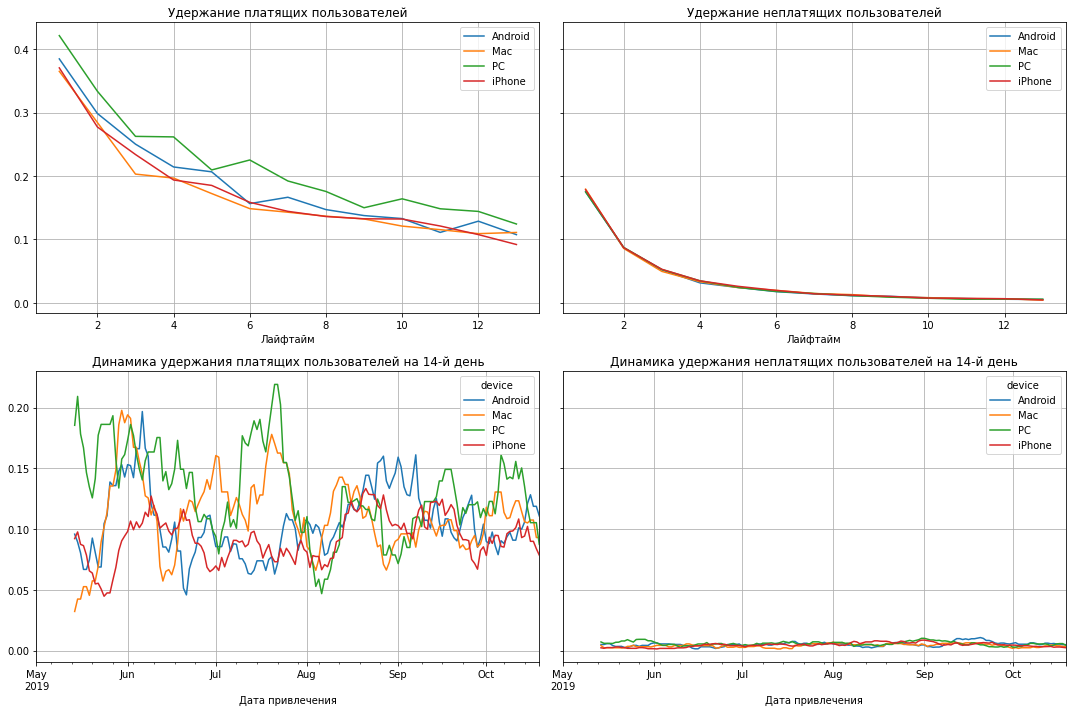

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи всех платформ стабильно плохо удерживаются. У неплатящих более резкое падение. Лучше остальных удерживаются платящие пользователи ПК, Iphone и Мас удерживаются слабее остальных

Разбивка устройств по странам

In [49]:
device_sum = profiles['device'].count()
device = profiles.pivot_table(index=['region', 'device'], values='user_id', aggfunc={'count'})
dev_region = device
dev_region['%'] = dev_region/device_sum*100
dev_region

count          %
region        device                   
France        Android   5252   3.501147
              Mac       1838   1.225268
              PC        6940   4.626420
              iPhone    3420   2.279878
Germany       Android   4440   2.959842
              Mac       1584   1.055944
              PC        5945   3.963122
              iPhone    3012   2.007893
UK            Android   5141   3.427151
              Mac       1778   1.185270
              PC        7138   4.758413
              iPhone    3518   2.345208
United States Android  20199  13.465282
              Mac      24842  16.560450
              PC       10432   6.954296
              iPhone   44529  29.684417

 <a id='24-bullet'></a> <b> Конверсия

Конверсия с разбивкой по источникам

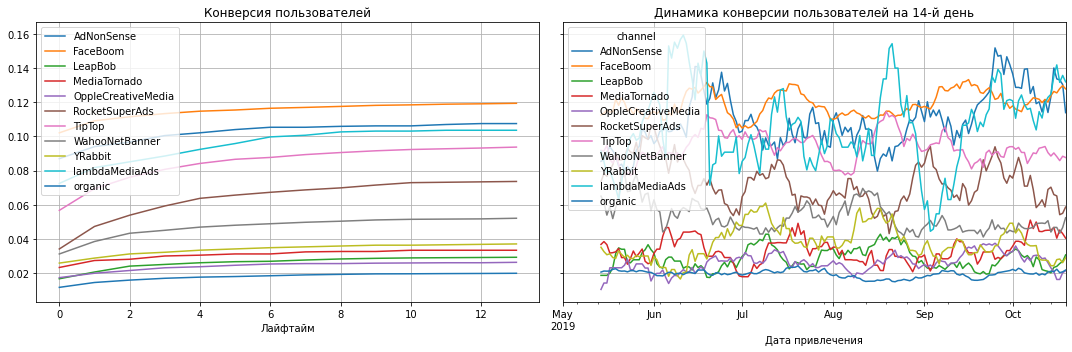

In [50]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

ФейсБум и Adnonsense лидеры конвертации, а вот ТипТоп, на который уходит половина рекламного бюджета конвертируется слабее и на 4м месте

Конверсия с разбивкой по устройствам

In [51]:
conversion_raw, conversion_grouped, conversion_history = \
    get_conversion(profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device'])

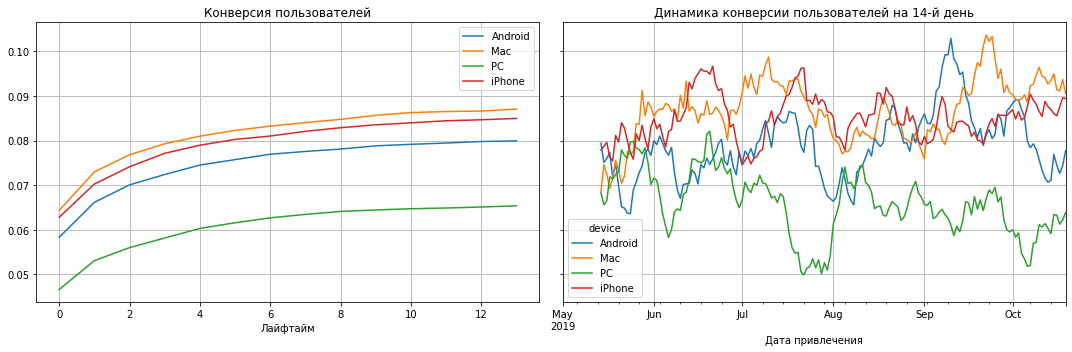

In [52]:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи Мас и iphone стабильно хорошо конвертируются

Конверсия с разбивкой по странам

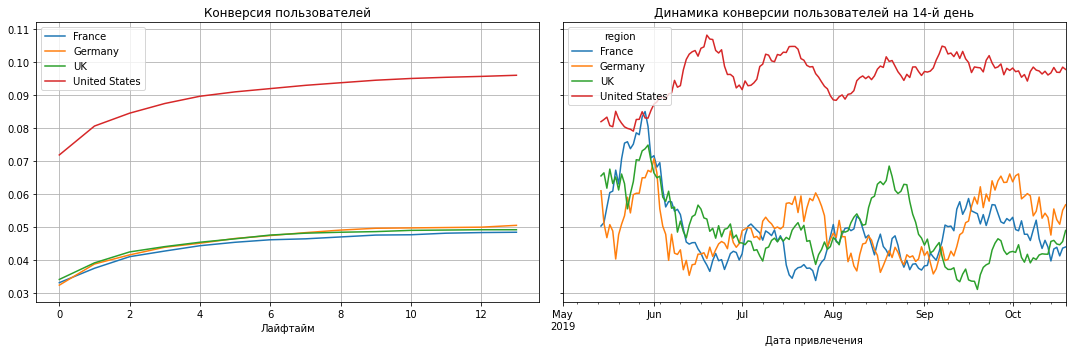

In [53]:
conversion_raw, conversion_grouped, conversion_history = \
    get_conversion(profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей США сильно выше чем в остальных странах

Вывод по разделу: реклама близка к окупаемости, но через 2 недели окупаемость доходит до 80%.\
Стоит обратить внимание на выстокую стоимть рекламы через канал Тип Топ и пользователей США, их привлечение значительно выше остальных\
Так же стоит обратить внимание на удержание пользователей ФейсБум, это самая многочисленная группа после органических

<a id='25-bullet'></a> <h4> 7 Общий вывод

Во время предобработки данных пробелы в названии столбцов были заменены на "_", названия приведены к нжнему регистру. Столбцы содержащие дату были приведены к формату дата. 
Было удалено 2 строчки с дубликатами.

Анализ окупаемости - задана граница в 14 дней.

Более 60% всех пользователей находятся в США, 6,9% платящие - что так же самый высокий показатель. В Европе это около 4%. 
Самыми "платящими" устройствами можно назвать айфон - 6.21% и мак 6.36% 
Было использовано 10 каналов привлечения пользователей, самым эффективным оказался FaceBoom привлек 29 тыс пользователей из нах 12.2 % платящих, AdNonSense и lambdaMediaAds привлекли меньше всех остальных каналов 3,8 и 2.1 тыс, однко среди этих пользователей более 10% платящие
 
Причины неэффективности привлечения пользователей:
По итогу 2х недель реклама окупается на 80% 

CAC нестабилен - бюджет на рекламу увеличивается с течением времени от 0,7 на пользователя в июне до 1,3 к октябрю. Сезонный фактор мало влияет на LTV, этот показатель достаточно стабилен. ROI пользователей падает. В июне этот показатель начинался с 1,2 в июле был выше уровня окупаемости, но после июля стал падать до 0.6. Чтобы разобраться в причинах, были изучены доступные характеристики пользователей — страна, канал привлечения и устройство пользователя.

Регионы \
LTV пользователей США самый высокий - растет от 0,4 в первый день жизни  до 1 к концу 2й недели. Стоимость привлечения пользователей США по сравнению с другими странами резко взлетает с июня от 0,8 до 1,2 и достигает 1,8 на пользователя к октябрю. В Европе стоимость привлечения начинается с 0,6 и к июлю немного падает до 0,4 далее стабильно до октября Окупаемость в США падает пропорционально росту стоимости. В динамике ROI начинается с 1,1, но уже в июле падает ниже окупаемости и к октябрю окупаемость США около 0,5.  Реклама в Европе стабильно окупается , а стоимоть ее не увеличивается. в динамике лучше всех дела в Великобритании - ROI преодалевает границу окупаемости уже к 4му дню и растет до 1,7 к 14му дню. Франция и Германия так же выше окупаемости 1,4 и 1,5 к концу 2й недели. \
Не смотря на значительные вложения в рекламу удержание платящих пользователей в США самое низкое за 2 недели с 0,4 падает до 0,1. В Европе падение носит схожий характер, но начинается с 0,5

Источники привлечения \
 Ниже окупаемости 3 - ТипТоп, FacеBoom и Adnonsense. Первые 2 работают с пользователями США и привлекают основную их часть, стоимость ФейсБум стабильна, а вот бюджет на ТипТоп увеличивается с каждым месяцем, начинается с 1 на пользователя в июне и к октябрю уже несколько раз превышает любой другой источник - 3.5 , так что этот канал оказался дальше всех от окупаемости. FacеBoom привлекает больше всех клиентов, но не окупается - стоимость стабильно 1,1. Раньше всех окупаются пользователи YRabbit уже на 2-й день жизни и к 14му оказываются на 2,7
Удержание платящих пользователей ФейсБум вызывает опасения, это самый массовый канал привлечения, со 2 по 4 день жизни наблюдается резкое падение, в целом за 2 недели опускается с 0,25 почти до 0. Удержание первого дня 0,25 против 0,55 у остальных каналов 


Усторйства: \
Стоимость привлечения пользователей Мак и айфон заметно выше остальных с 0,7 в июле растет до 1,5 в октябре, а вот LTV у всех платформ примерно одинаковое с 0,3 растет до 0,9 к концу второй недели. Пользователи айфон и мак не окупаются - на 14й день 0,7. Андроид близко к окупаемости 0,9 на 14й день. Удерживаются одинаково пользователи всех устройств. с 0,4 падает до 0,1 к концу 2й недели Стоит больше внимания уделять пользователям ПК, они чуть лучше удерживаются и окупаются

Рекомендации: \
Более 80% затра приходятся на 2 источника:
Тип Топ 13% всех пользователей - платящих - 9,6% - 51% бюджета \
ФейсБум 19.5% всех пользоватлей - платящих 12,2% - 30% бюджета. \
На каждый оставшийся источник приходится менее 5% бюджета.
Следует перебалансировать бюджет и вкладыаться в другие каналы привлечения.
Принять во внимание что ФейсБум лучше всех конвертируются платящих  0,12 стабильно.

Возможно стоит купить рекламу у источников на которые в 2019 ставки не было, например, YRabbit показывает самую высокую окупаемость (2,7 к концу второй недели) и удержание на среднем уровне. MediaTornado и lambdaMedia тоже показывают хороший результат.  На YRabbit и MediaTornado стоит обратить внимание еще и потому, что он работают с пользователями из США, которых в коипании больше всего, а конверсия пользователей США значительно выше чем в Европе примерно 0,09 против 0,05. 


Удержание платящих пользователей самого массового канал привлечения - Фейсбум вызывает опасения. Пользователи урерживаются в 2 раза хуже всех остальных каналов и к концу второй недели остается 0,02. Остальные каналы примерно 0,2. Стоит напрвиль усилия на удержание этой группы

